Hypothesis = 1.8587153218483103 + 3.181326922882315*x


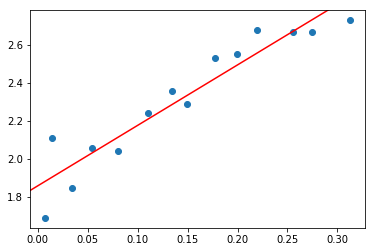

In [2]:
##MACHINE LEARNING - LINEAR REGRESSION Practice

#Imports
import matplotlib.pyplot as plt

#Variables
a0 = float(0)
a1 = float(0)
n = 0
lr0 = float(1)
lr1 = float(1)
tempcost = 0
percentchange = 0
REQ_PERCENT_CHANGE = 0.0000000000001
inp = []
x_mul = 1
y_mul = 1
x_centroid = 0
y_centroid = 0
x_min = 0
X_max = 0
y_min = 0
y_max = 0
LR0_FACTOR = 2
LR1_FACTOR = 2
PLT_MARGIN = 0.05

#Get input as list of list [(x1,y1),(x2,y2)] from input.txt
with open('input.txt') as inpfile:
  content = inpfile.readlines()
  n = len(content)
  for ii in range(0,n):
    x,y = content[ii].split()
    data = content[ii].split()
    inp.append([float(x),float(y)])
    x_centroid = x_centroid + float(x)
    y_centroid = y_centroid + float(y)
x_centroid = x_centroid/n
y_centroid = y_centroid/n
  
#Min and Max of Data
x_min = float(inp[0][0])
x_max = inp[0][0]
y_min = inp[0][1]
y_max = inp[0][1]
for ii in range(1,n):
  if inp[ii][0]<x_min:
    x_min = inp[ii][0]
  if inp[ii][0]>x_max:
    x_max = inp[ii][0]
  if inp[ii][1]<y_min:
    y_min = inp[ii][1]
  if inp[ii][1]>y_max:
    y_max = inp[ii][1] 

#Used to normalize data to fit centroid in between 1(inc) and 10(ex)
def multiplier(z):
  mul = 0
  if z != 0:
    if z >= 10:
      while int(z)%10 != 0:
        mul = mul + 1
        z = z / 10
    if z < 1:
      while int(z)%10 == 0:
        mul = mul - 1
        z = z * 10 
  #Format is [1-10)*(10^mul)
  return mul

#Normalize data
x_mul = multiplier(x_centroid)
y_mul = multiplier(y_centroid)
for ii in range(0,n):
  inp[ii][0] = inp[ii][0] / 10**int(x_mul)
  inp[ii][1] = inp[ii][1] / 10**int(y_mul)

#Modulus function
def mod(z):
  if float(z)<0:
    return -z
  return z

#Hypothesis
def hypo(x):
  return (a0 + a1*x)

#Cost function
def cost():
  c = 0
  for ii in range(0,n):
    x = hypo(inp[ii][0]) - inp[ii][1]
    c = c + x*x
  c = c/(2*n)
  return c

#For partial derivative of Cost w.r.t a0
def sumtempa0():
  temp = float(0)
  for ii in range(0,n):
    temp = temp + (hypo(inp[ii][0]) - inp[ii][1])
  return temp

#For partial derivative of Cost w.r.t a1
def sumtempa1():
  temp = float(0)
  for ii in range(0,n):
    temp = temp + (inp[ii][0]*(hypo(inp[ii][0]) - inp[ii][1]))
  return temp

#Signum
def signum(z):
  if z >= 0:
    return 1
  elif z < 1:
    return -1

#Algorithm
#Hypothesis: H(x) = a0 + a1*x
tempcost = cost()
while True:
  #Refine a0 and a1
  tempa0 = a0 - lr0*(sumtempa0()/n)
  tempa1 = a1 - lr1*(sumtempa1()/n)
  #Learning Rate Adjustion
  if signum(a0) != signum(tempa0):
    lr0 = lr0 / LR0_FACTOR
  if signum(a1) != signum(tempa1):
    lr1 = lr1 / LR1_FACTOR
  a0 = tempa0
  a1 = tempa1
  #print(f"{lr0},{lr1}")
  #print(f"{a0}, {a1}")
  #Cost and changes
  tempcost2 = cost()
  percent_change = (tempcost2 - tempcost)/100
  if mod(percent_change) <= REQ_PERCENT_CHANGE:
    break
  tempcost = tempcost2

#Final modifications of coefficients
a0 = a0 * 10**y_mul
a1 = a1 * 10**(y_mul - x_mul)

#Print
#We now have final (kinda) accurate Hypothesis
print(f"Hypothesis = {a0} + {a1}*x")

#Plot
x_diff = x_max - x_min
y_diff = y_max - y_min
X_MIN = x_min - (x_diff)*PLT_MARGIN
X_MAX = x_max + (x_diff)*PLT_MARGIN
Y_MIN = y_min - (y_diff)*PLT_MARGIN
Y_MAX = y_max + (y_diff)*PLT_MARGIN
plt.xlim(X_MIN,X_MAX)
plt.ylim(Y_MIN,Y_MAX)
plt.plot([float(z[0]*10**x_mul) for z in inp],[float(z[1]*10**y_mul) for z in inp],'o')
plt.plot([X_MIN,X_MAX],[a0+X_MIN*a1,a0+X_MAX*a1],'-r')
plt.show()